In [ ]:
# question: 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
races = pd.read_csv("data_raw/races.csv")

merge = pd.merge(drivers[['driverId', 'forename', 'surname','nationality']],
                 results[['driverId', 'raceId', 'milliseconds']], 
                 on = "driverId",
                 how = "left")
                 
merge["milliseconds"] = merge["milliseconds"].replace('\\N', np.nan)
                                                      
merge["milliseconds"] = pd.to_numeric(merge["milliseconds"])

merged_cleaned = merge.dropna()

merged_cleaned.dtypes

merge2 = (merged_cleaned.groupby("nationality")
                        .agg(avg_time = ('milliseconds','mean'))
                        .sort_values("avg_time",ascending = True))

merge2




,avg_time
nationality,
Colombian,5.382080e+06
Finnish,5.738092e+06
Monegasque,5.772770e+06
Canadian,5.825663e+06
Brazilian,5.834248e+06
Polish,5.850948e+06
German,5.859610e+06
Thai,5.864793e+06
Dutch,5.865689e+06


In [186]:
mergeraces = pd.merge(merge[['raceId','driverId','nationality','milliseconds']],
                 races[['raceId', 'year', 'date', 'time']], 
                 on = "raceId",
                 how = "left")

mergeraces = mergeraces.dropna()

merged_n = mergeraces.query("nationality == 'Colombian' or nationality == 'Finnish' or nationality == 'Monegasque'") \
                .groupby(['year', 'nationality']) \
                .agg(avg_time=('milliseconds', 'mean')) .reset_index()

test = (pd.pivot(merged_n,
                           index = 'year',
                           columns = 'nationality',
                           values =  'avg_time'))

test


                 

nationality,Colombian,Finnish,Monegasque
year,,,
1980.0,NaN,6.283020e+06,NaN
1982.0,NaN,6.010582e+06,NaN
1983.0,NaN,6.382590e+06,NaN
1984.0,NaN,5.726870e+06,NaN
1985.0,NaN,6.109307e+06,NaN
1986.0,NaN,5.953211e+06,NaN
1991.0,NaN,1.573418e+06,NaN
1992.0,NaN,5.841592e+06,NaN
1993.0,NaN,6.054041e+06,NaN


ValueError: x and y must have same first dimension, but have shapes (1,) and (37,)

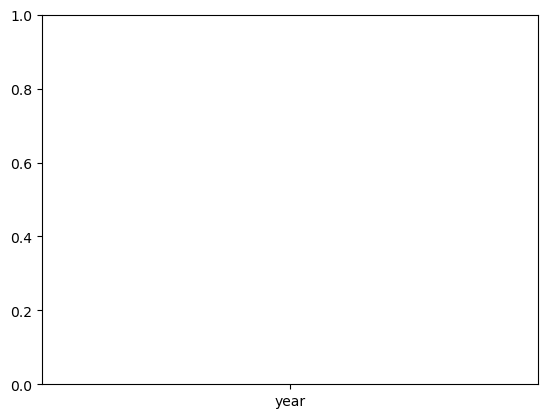

In [191]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime      

plt.plot("year", "Colombian",
          data = test)
plt.plot("year", "Finnish",
          data = test)


#graphing average race time by nationality over a time period 